# Thu thập dữ liệu

Nhóm sẽ thu thập dữ liệu thông tin về xe hơi đã qua sử dụng trên trang web https://www.truecar.com/used-cars-for-sale/listings/

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [ ]:
# Mở Chrome và cho full màn hình
browser = webdriver.Chrome(executable_path='C:/Users/Admin/Desktop/chromedriver')
browser.maximize_window()

In [ ]:
# Mở trang web cần thu thập thông tin
browser.get('https://www.truecar.com/used-cars-for-sale/listings/?sort[]=best_match')

In [ ]:
# Cột bên trái chọn 3 hãng Honda, Ford, Huyndai, Years: 2013-2020 
#- VD: năm 2013: lấy thông tin 100 xe Honda, 100 xe Ford, 100 xe Huyndai
#- Tiếp tục làm vậy đến năm 2020
#--> có tổng cộng (100*3)*8 = 2400 thông tin xe
makes = ['Honda', 'Ford', 'Hyundai','Mercedes-Benz', 'Toyota', 'Mazda']
start_year = 2013
end_year = 2020
max_cars= 500

In [ ]:
#Chọn năm kết thúc
#year_max = browser.find_elements_by_css_selector('[aria-label="Year Max"] option')
#for year_1 in year_max:
#    if str(start_year) in year_1.text:
#        year_1.click()
#        break

In [ ]:
# chọn năm bắt đầu
#year_min = browser.find_elements_by_css_selector('[aria-label="Year Min"] option')
#for year in year_min:
#    if str(start_year) in year.text:
#        year.click()
#        break

In [ ]:
#Chọn hãng (Make)
#make = browser.find_elements_by_css_selector('[aria-label="Make"] option')
#for i in make:
#    if 'Honda' in i.text:
#        i.click()
#        break

In [ ]:
#browser.quit()

In [ ]:
# Ấn nút sang trang tiếp theo
#browser.find_element_by_css_selector('[data-qa="Pagination-directional-next"]').click()

In [ ]:
##Test thu thập dữ liệu 1 o to
#link = 'https://www.truecar.com/used-cars-for-sale/listing/1FTNE1EL8CDA68267/2012-ford-econoline-cargo-van/'
##link = 'https://www.truecar.com/used-cars-for-sale/listing/2HKRM3H77DH522986/2013-honda-cr-v/?sponsoredVehiclePosition=2'
#text = requests.get(link).text
#cay = BeautifulSoup(text, 'html.parser')
#Model = cay.find('div',{'class':'text-truncate heading-3 margin-right-2 margin-right-sm-3'}).string.split(' ',2)[2]
#print(Model)
#
#
#Vehicle_Overview = cay.find_all('div',{'class':"_1l9na3c align-self-center col"})
#for i in Vehicle_Overview:
#    try:
#        if 'Style' in i.text:
#            Body_style = i.text[5:]
#        elif 'Mileage' in i.text:
#            Mileage = i.text[7:]
#        elif 'Engine' in i.text:
#            Engine = i.text[6:]
#        elif 'Fuel Type' in i.text:
#            Fuel_type = i.text[9:]
#    except:
#        Body_style = ''
#        Mileage = ''
#        Engine = ''
#        Fuel_type = ''
#        continue
#
#print(Body_style)
#
#Year = year
#print(Year)
#
#print(Mileage)
#
#print(Engine)
#
#print(Fuel_type)
#
#try:
#    Number_of_owners = cay.find_all('li',{'class':"_h9wfdq"})[3].text
#except:
#    Number_of_owners =''
#print(Number_of_owners)
#
#try:
#    Price = cay.find('div',{'data-qa':"LabelBlock-text"}).text[1:]
#except:
#    Price = ''
#print(Price)

In [ ]:
web = 'http://truecar.com'
file = open('raw_data1.csv', 'w', encoding='utf-8')
file.write(f'make\tmodel\tbody style\tyear\tmileage\tengine\tfuel type\tnumber of owners\tprice\n')
for make in makes:
    #Chọn hãng (Make)
    make_option = browser.find_elements_by_css_selector('[aria-label="Make"] option')
    for make_1 in make_option:
        if make in make_1.text:
            make_1.click()
            break
    time.sleep(5)
    for year in range(start_year,end_year+1):
        dem = 0
        #Chọn năm kết thúc
        year_max = browser.find_elements_by_css_selector('[aria-label="Year Max"] option')
        for year_1 in year_max:
            if str(year) in year_1.text:
                year_1.click()
                break
        time.sleep(5)
        #chọn năm bắt đầu
        year_min = browser.find_elements_by_css_selector('[aria-label="Year Min"] option')
        for year_2 in year_min:
            if str(year) in year_2.text:
                year_2.click()
                break
        time.sleep(5)
        
        html_text = browser.page_source
        tree = BeautifulSoup(html_text, 'html.parser')
        cars = tree.find_all('div', {'data-qa': 'Listings'})
        #lấy thông tin xe
        for car in cars:
            dem=dem+1
            if(dem>max_cars):
                break
            url = car.find('a', {'class':'card card-1 card-shadow card-shadow-hover vehicle-card _1qd1muk'})['href']
            car_html_text = ''
            while car_html_text == '':
                try:
                    car_html_text = requests.get(web+url).text
                    car_tree = BeautifulSoup(car_html_text, 'html.parser')
                    break
                except:
                    print("ConnectionError")
                    time.sleep(5)
                    continue
            #Make
            Make = make
            
            #Model
            try:
                Model = car_tree.find('div',{'class':'text-truncate heading-3 margin-right-2 margin-right-sm-3'}).string.split(' ',2)[2]
            except:
                Model = ''
                
            #Style, Mileage, Engine, Fuel Type    
            Vehicle_Overview = car_tree.find_all('div',{'class':"_1l9na3c align-self-center col"})
            for i in Vehicle_Overview:
                try:
                    if 'Style' in i.text:
                        Body_style = i.text[5:]
                    elif 'Mileage' in i.text:
                        Mileage = i.text[7:]
                    elif 'Engine' in i.text:
                        Engine = i.text[6:]
                    elif 'Fuel Type' in i.text:
                        Fuel_type = i.text[9:]
                except:
                    Body_style = ''
                    Mileage = ''
                    Engine = ''
                    Fuel_type = ''
                    continue
               
            #Year
            Year = year
            
            #Number of owners
            try:
                Number_of_owners = car_tree.find_all('li',{'class':"_h9wfdq"})[3].text
            except:
                Number_of_owners =''

            #Price
            try:
                Price = car_tree.find('div',{'data-qa':"LabelBlock-text"}).text[1:]
            except:
                Price = ''
            file.write(f'{Make}\t{Model}\t{Body_style}\t{Year}\t{Mileage}\t{Engine}\t{Fuel_type}\t{Number_of_owners}\t{Price}\n')
        while True:
            if(dem>max_cars):
                break
            # Ấn nút sang trang tiếp theo
            browser.find_element_by_css_selector('[data-qa="Pagination-directional-next"]').click()
            time.sleep(1)
            
            html_text = browser.page_source
            tree = BeautifulSoup(html_text, 'html.parser')
            cars = tree.find_all('div', {'data-qa': 'Listings'})
            
            #Thông tin xe
            for car in cars:
                dem=dem+1
                if(dem>max_cars):
                    break
                url = car.find('a', {'class':'card card-1 card-shadow card-shadow-hover vehicle-card _1qd1muk'})['href']
                car_html_text = ''
                while car_html_text == '':
                    try:
                        car_html_text = requests.get(web+url).text
                        car_tree = BeautifulSoup(car_html_text, 'html.parser')
                        break
                    except:
                        print("ConnectionError")
                        time.sleep(5)
                        continue
                
                #Make
                Make = make
            
                #Model
                try:
                    Model = car_tree.find('div',{'class':'text-truncate heading-3 margin-right-2 margin-right-sm-3'}).string.split(' ',2)[2]
                except:
                    Model = ''
                    
                #Style, Mileage, Engine, Fuel Type    
                Vehicle_Overview = car_tree.find_all('div',{'class':"_1l9na3c align-self-center col"})
                for i in Vehicle_Overview:
                    try:
                        if 'Style' in i.text:
                            Body_style = i.text[5:]
                        elif 'Mileage' in i.text:
                            Mileage = i.text[7:]
                        elif 'Engine' in i.text:
                            Engine = i.text[6:]
                        elif 'Fuel Type' in i.text:
                            Fuel_type = i.text[9:]
                    except:
                        Body_style = ''
                        Mileage = ''
                        Engine = ''
                        Fuel_type = ''
                        continue
                 
                #Year
                Year = year
                
                #Number of owners
                try:
                    Number_of_owners = car_tree.find_all('li',{'class':"_h9wfdq"})[3].text
                except:
                    Number_of_owners =''
                
                #price
                try:
                    Price = car_tree.find('div',{'data-qa':"LabelBlock-text"}).text[1:]
                except:
                    Price = ''
                file.write(f'{Make}\t{Model}\t{Body_style}\t{Year}\t{Mileage}\t{Engine}\t{Fuel_type}\t{Number_of_owners}\t{Price}\n')
file.close()
browser.quit()
print('Done!')

# Khám phá dữ liệu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
raw_used_car_df = pd.read_csv('raw_data.csv', sep = '\t')
raw_used_car_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"
1,Honda,Pilot,EX FWD,2013,"80,532",3.5L V-6 Gas,Gas,3.0,"11,694"
2,Honda,CR-V,LX FWD,2013,"79,796",2.4L Inline-4 Gas,Gas,1.0,"13,590"
3,Honda,Civic,LX Sedan Automatic,2013,"76,882",1.8L Inline-4 Gas,Gas,1.0,"7,986"
4,Honda,Civic,LX Sedan Automatic,2013,"113,673",1.8L Inline-4 Gas,Gas,1.0,"6,990"


## Dữ liệu có bao nhiêu dòng, bao nhiêu cột?

In [3]:
raw_used_car_df.shape

(4800, 9)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng ý nghĩa khác nhau không?

Mỗi dòng cho biết thông tin cơ bản về 1 chiếc xe

Các dòng có ý nghĩa là giống nhau

### Dữ liệu có các dòng bị lặp không?

In [4]:
raw_used_car_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4795    False
4796    False
4797    False
4798    False
4799    False
Length: 4800, dtype: bool

In [5]:
# Bao nhiêu dòng bị lặp?
num_row_dup = raw_used_car_df.duplicated().sum()
num_row_dup

148

In [6]:
# Dòng nào bị lặp?
duplicated_rows = raw_used_car_df[raw_used_car_df.duplicated()]
duplicated_rows

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
394,Honda,Pilot,EX-L AWD,2016,"124,363",3.5L V-6 Gas,Gas,1.0,"17,792"
395,Honda,Civic,EX Sedan CVT,2016,"79,118",2.0L Inline-4 Gas,Gas,2.0,"13,000"
396,Honda,Civic,LX Sedan CVT,2016,"53,433",2.0L Inline-4 Gas,Gas,1.0,"10,970"
397,Honda,Accord,EX-L V6 Sedan Automatic,2016,"98,855",3.5L V-6 Gas,Gas,1.0,"12,995"
...,...,...,...,...,...,...,...,...,...
4233,Mazda,Mazda3,i Touring 4-Door Automatic,2015,"161,366",2.0L Inline-4 Gas,Gas,1.0,"6,990"
4234,Mazda,CX-5,Grand Touring AWD Automatic,2015,"81,477",2.5L Inline-4 Gas,Gas,1.0,"14,995"
4288,Mazda,CX-5,Grand Touring AWD Automatic,2015,"95,609",2.5L Inline-4 Gas,Gas,1.0,"12,955"
4658,Mazda,Mazda6,Touring Automatic,2019,"29,144",2.5L Inline-4 Gas,Gas,1.0,"19,200"


In [7]:
group_cars = raw_used_car_df.groupby(['make', 'model', 'body style', 'year'])

In [8]:
# Kiểm tra thử dòng 393 xem có đúng là dòng 393 bị lặp không?
# --> đúng, ta thấy dòng 393 bị lặp lại dòng 363 trong bảng dưới
group_cars.get_group(('Honda', 'Accord', 'EX-L Sedan I4 CVT', 2016))

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
332,Honda,Accord,EX-L Sedan I4 CVT,2016,"195,707",2.4L Inline-4 Gas,Gas,1.0,"10,912"
346,Honda,Accord,EX-L Sedan I4 CVT,2016,"35,471",2.4L Inline-4 Gas,Gas,1.0,"15,793"
363,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"
378,Honda,Accord,EX-L Sedan I4 CVT,2016,"94,394",2.4L Inline-4 Gas,Gas,1.0,"11,900"
393,Honda,Accord,EX-L Sedan I4 CVT,2016,"66,848",2.4L Inline-4 Gas,Gas,2.0,"15,995"


In [9]:
# Bỏ đi các dòng bị lặp, gán vào dataframe mới
used_car_df = raw_used_car_df.drop_duplicates()

In [10]:
used_car_df.shape

(4652, 9)

In [11]:
# Kiểm tra lại dataframe mới có còn dòng nào bị lặp không?
num_dup = used_car_df.duplicated().sum()
num_dup

0

In [12]:
# Test
assert num_dup == 0
assert used_car_df.shape == (raw_used_car_df.shape[0] - num_row_dup, raw_used_car_df.shape[1])

### Mỗi cột có ý nghĩa gì?

In [13]:
used_car_df.head(1)

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,"122,986",3.5L V-6 Gas,Gas,2.0,"12,895"


* <b>Cột "make"</b>:             tên hãng xe
* <b>Cột "model"</b>:            tên dòng xe
* <b>Cột "body style"</b>:       dáng xe (kết cấu thân xe)
* <b>Cột "year"</b>:             năm sản xuất chiếc xe
* <b>Cột "mileage"</b>:          tổng số dặm xe đã đi
* <b>Cột "engine"</b>:           thông số động cơ xe
* <b>Cột "fuel type"</b>:        xe đi loại nhiên liệu gì?
* <b>Cột "number of owners"</b>: xe đã qua tay bao nhiêu đời chủ rồi?
* <b>Cột "price"</b>:            giá thành xe hiện được bán

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để xử lý tiếp không?

In [14]:
dtypes = used_car_df.dtypes
dtypes

make                 object
model                object
body style           object
year                  int64
mileage              object
engine               object
fuel type            object
number of owners    float64
price                object
dtype: object

Trong Pandas, kiểu dữ liệu "object" thường ám chỉ chuỗi. Tuy nhiên, "object" có thể ám chỉ một kiểu dữ liệu bất kỳ. "object" giống như con trỏ, có thể trỏ tới một đối tượng bất kỳ

Để biết chính xác kiểu dữ liệu đang được lưu, tiến hành lấy giá trị từng cột để xem

In [15]:
print('make:', type(used_car_df.loc[0, 'make']))
print('model:', type(used_car_df.loc[0, 'model']))
print('body style:', type(used_car_df.loc[0, 'body style']))
print('mileage:', type(used_car_df.loc[0, 'mileage']))
print('engine:', type(used_car_df.loc[0, 'engine']))
print('fuel type:', type(used_car_df.loc[0, 'fuel type']))
print('price:', type(used_car_df.loc[0, 'price']))

make: <class 'str'>
model: <class 'str'>
body style: <class 'str'>
mileage: <class 'str'>
engine: <class 'str'>
fuel type: <class 'str'>
price: <class 'str'>


#### Một vài đánh giá về giá trị cột để tiền xử lý kiểu dữ liệu của cột

* <b>Cột "mileage"</b>, <b>"price"</b>: ta cần dữ liệu dạng số thực, mà ở đây đang ở dạng chuỗi --> tiến hành tiền xử lý để đưa từ kiểu chuỗi sang số thực

# Tiền xử lý

## Chuyển kiểu dữ liệu cột "mileage", "price" sang kiểu số thực

In [16]:
# bỏ dấu phẩy
used_car_df.loc[:, 'mileage'] = used_car_df.loc[:, 'mileage'].str.replace(',', '')
used_car_df.loc[:, 'price'] = used_car_df.loc[:, 'price'].str.replace(',', '')

In [17]:
# chuyển sang kiểu float
used_car_df['mileage'] = used_car_df['mileage'].astype(float)
used_car_df['price'] = used_car_df['price'].astype(float)
used_car_df

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,122986.0,3.5L V-6 Gas,Gas,2.0,12895.0
1,Honda,Pilot,EX FWD,2013,80532.0,3.5L V-6 Gas,Gas,3.0,11694.0
2,Honda,CR-V,LX FWD,2013,79796.0,2.4L Inline-4 Gas,Gas,1.0,13590.0
3,Honda,Civic,LX Sedan Automatic,2013,76882.0,1.8L Inline-4 Gas,Gas,1.0,7986.0
4,Honda,Civic,LX Sedan Automatic,2013,113673.0,1.8L Inline-4 Gas,Gas,1.0,6990.0
...,...,...,...,...,...,...,...,...,...
4795,Mazda,CX-5,Grand Touring FWD,2020,13964.0,2.5L Inline-4 Gas,Gas,1.0,23888.0
4796,Mazda,CX-5,Sport FWD,2020,3759.0,2.5L Inline-4 Gas,Gas,1.0,22498.0
4797,Mazda,CX-5,Sport FWD,2020,9916.0,2.5L Inline-4 Gas,Gas,1.0,21990.0
4798,Mazda,CX-9,Grand Touring AWD,2020,5176.0,2.5L Inline-4 Gas Turbocharged,Gas,1.0,36992.0


## Giảm sự phức tạp của cột engine bằng cách chỉ lấy thông số lít(L) của động cơ

In [18]:
# lấy thông số lít và chuyển nó sang kiểu số thực
used_car_df['engine'] = used_car_df['engine'].str.extract(r'(\d+.\d+L)')
used_car_df['engine'] = used_car_df['engine'].str.replace('L', '').astype(float)
used_car_df

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,122986.0,3.5,Gas,2.0,12895.0
1,Honda,Pilot,EX FWD,2013,80532.0,3.5,Gas,3.0,11694.0
2,Honda,CR-V,LX FWD,2013,79796.0,2.4,Gas,1.0,13590.0
3,Honda,Civic,LX Sedan Automatic,2013,76882.0,1.8,Gas,1.0,7986.0
4,Honda,Civic,LX Sedan Automatic,2013,113673.0,1.8,Gas,1.0,6990.0
...,...,...,...,...,...,...,...,...,...
4795,Mazda,CX-5,Grand Touring FWD,2020,13964.0,2.5,Gas,1.0,23888.0
4796,Mazda,CX-5,Sport FWD,2020,3759.0,2.5,Gas,1.0,22498.0
4797,Mazda,CX-5,Sport FWD,2020,9916.0,2.5,Gas,1.0,21990.0
4798,Mazda,CX-9,Grand Touring AWD,2020,5176.0,2.5,Gas,1.0,36992.0


In [19]:
new_dtypes = used_car_df.dtypes
new_dtypes

make                 object
model                object
body style           object
year                  int64
mileage             float64
engine              float64
fuel type            object
number of owners    float64
price               float64
dtype: object

# Quay lại bước khám phá dữ liệu

## Với mỗi cột có dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?  

In [20]:
used_car_df.head()

,make,model,body style,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,Touring Elite,2013,122986.0,3.5,Gas,2.0,12895.0
1,Honda,Pilot,EX FWD,2013,80532.0,3.5,Gas,3.0,11694.0
2,Honda,CR-V,LX FWD,2013,79796.0,2.4,Gas,1.0,13590.0
3,Honda,Civic,LX Sedan Automatic,2013,76882.0,1.8,Gas,1.0,7986.0
4,Honda,Civic,LX Sedan Automatic,2013,113673.0,1.8,Gas,1.0,6990.0


In [21]:
used_car_df.describe()

,year,mileage,engine,number of owners,price
count,4652.000000,4652.000000,4640.000000,4646.000000,4647.000000
mean,2016.484523,61257.651118,2.546358,1.501507,17377.042608
std,2.291951,41320.204962,1.016791,0.794693,10211.005659
min,2013.000000,5.000000,1.000000,0.000000,2996.000000
25%,2014.000000,29987.000000,2.000000,1.000000,10747.500000
50%,2016.000000,53241.000000,2.400000,1.000000,14590.000000
75%,2018.000000,88154.750000,2.500000,2.000000,20899.500000
max,2020.000000,310215.000000,7.200000,6.000000,129982.000000


### Bảng mô tả

In [22]:
numeric_cols_df = used_car_df.select_dtypes(exclude = 'object')

def missing_ratio(col):
    return col.isna().mean() * 100

def median(col):
    return col.quantile(0.5)

def lower_quartile(col):
    return col.quantile(0.25)

def upper_quartile(col):
    return col.quantile(0.75)

numeric_cols_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max])

,year,mileage,engine,number of owners,price
missing_ratio,0.0,0.00,0.257954,0.128977,0.107481
min,2013.0,5.00,1.000000,0.000000,2996.000000
lower_quartile,2014.0,29987.00,2.000000,1.000000,10747.500000
median,2016.0,53241.00,2.400000,1.000000,14590.000000
upper_quartile,2018.0,88154.75,2.500000,2.000000,20899.500000
max,2020.0,310215.00,7.200000,6.000000,129982.000000


Vẽ Histogram minh họa trực quan cho giá trị của từng cột

### Biểu đồ histogram biểu thị mối liên hệ giữa: tổng số dặm và số lượng xe

Text(0, 0.5, 'Số xe')

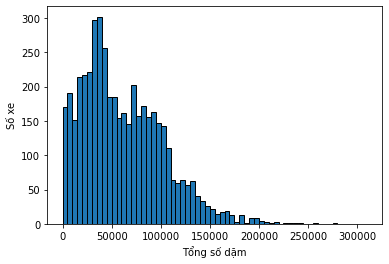

In [23]:
used_car_df['mileage'].plot.hist(bins = range(5, 311000, 5000), edgecolor = 'black')
plt.xlabel('Tổng số dặm')
plt.ylabel('Số xe')

### Biểu đồ histogram biểu thị mối liên hệ giữa: thông số động cơ và số lượng xe

Text(0, 0.5, 'Số xe')

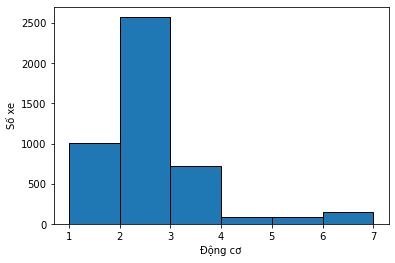

In [24]:
used_car_df['engine'].plot.hist(bins = range(1, 8, 1), edgecolor = 'black')
plt.xlabel('Động cơ')
plt.ylabel('Số xe')

### Biểu đồ histogram biểu thị mối liên hệ giữa: giá tiền và số lượng xe

Text(0, 0.5, 'Số xe')

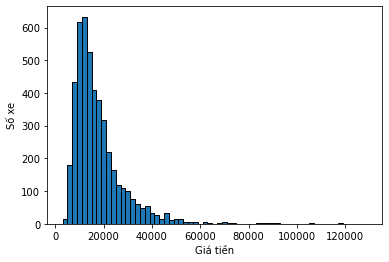

In [25]:
used_car_df['price'].plot.hist(bins = range(2990, 130000, 2000), edgecolor = 'black')
plt.xlabel('Giá tiền')
plt.ylabel('Số xe')

## Với mỗi cột có kiểu dữ liệu không phải dạng số (ở đây chủ yếu ta ám chỉ dạng categorical), các giá trị được phân bố như thế nào? 

### Bảng mô tả

In [26]:
cate_cols_df = used_car_df.select_dtypes(include = 'object')

def value_counts(col):
    return dict(col.value_counts())

# tỉ lệ giá trị thiếu, số lượng giá trị duy nhất, thống kê giá trị duy nhất
category_stat = cate_cols_df.agg([missing_ratio, pd.Series.nunique, value_counts])
pd.set_option('display.max_colwidth', 10000)
category_stat

,make,model,body style,fuel type
missing_ratio,0,0.107481,0,0
nunique,6,104,753,7
value_counts,"{'Toyota': 798, 'Hyundai': 798, 'Mazda': 792, 'Mercedes-Benz': 788, 'Ford': 750, 'Honda': 726}","{'CX-5': 356, 'Elantra': 320, 'Corolla': 246, 'Civic': 227, 'C-Class': 225, 'Mazda3': 201, 'Camry': 188, 'Accord': 187, 'Sonata': 185, 'F-150': 163, 'CR-V': 142, 'Fusion': 124, 'Mazda6': 112, 'E-Class': 109, 'Super Duty F-250': 105, 'Tucson': 102, 'RAV4': 98, 'GLC': 97, 'Escape': 65, 'CX-9': 58, 'GLA': 57, 'Accent': 56, 'Focus': 54, 'Tacoma': 50, 'Prius': 47, 'GLE': 47, 'Santa Fe': 46, 'Odyssey': 46, 'Edge': 45, 'Pilot': 44, 'Santa Fe Sport': 43, 'Sienna': 42, 'CLA': 40, 'Transit Passenger Wagon': 38, 'Explorer': 38, 'Super Duty F-350': 37, 'HR-V': 33, 'Fiesta': 28, 'M-Class': 27, 'Veloster': 26, 'GLK': 25, 'S-Class': 25, '4Runner': 25, 'Highlander': 25, 'GL': 25, 'Fit': 23, 'CX-3': 22, 'A-Class': 18, 'Tundra': 17, 'MX-5 Miata': 17, 'GLS': 15, 'Mazda5': 15, 'Mustang': 13, 'Avalon': 13, 'Prius c': 11, 'Metris Passenger Van': 11, 'Sprinter Cargo Van': 11, 'SL': 11, 'Ridgeline': 10, 'Metris Cargo Van': 10, 'GLB': 8, 'Yaris': 7, 'Prius v': 7, 'Mazda2': 7, 'Taurus': 7, 'Genesis Coupe': 6, 'Venza': 6, 'CLS': 6, 'Transit Cargo Van': 6, 'C-Max': 6, 'Super Duty F-350 Chassis Cab': 5, 'Insight': 5, 'Mirai': 4, 'Genesis': 4, 'Sprinter Passenger Van': 4, 'Econoline Commercial Cutaway': 4, 'Passport': 4, 'Azera': 4, 'Transit Connect Van': 4, 'Expedition': 4, 'Sprinter Chassis Cabs': 3, 'B-Class': 3, 'CX-30': 3, 'C-HR': 3, 'SLK': 3, 'Yaris iA': 3, 'G-Class': 3, 'Equus': 2, 'FJ Cruiser': 2, 'Kona': 2, 'SLC': 2, 'Corolla iM': 2, 'AMG GT': 1, 'CR-Z': 1, 'Ranger': 1, 'Ioniq': 1, 'Clarity': 1, 'EcoSport': 1, 'Prius Prime': 1, 'Sprinter Crew Van': 1, ...}","{'LE CVT': 135, 'SE FWD': 118, 'LX Sedan CVT': 85, 'Touring FWD': 79, 'C 300 Sedan RWD': 73, 'SEL 2.0L IVT': 65, 'Grand Touring FWD': 61, 'SE Sedan Automatic': 58, 'XLT SuperCrew 5.5' Box 4WD': 54, 'Grand Touring AWD': 52, 'C 300 4MATIC Sedan': 48, 'Touring AWD': 48, 'SE I4 Automatic': 46, 'GLC 300 SUV RWD': 44, 'SE 2.4L': 43, 'GLS Sedan Automatic': 42, 'SE Sedan': 40, 'SEL FWD': 40, 'Touring Automatic': 40, 'Sport FWD': 38, 'C 250 Sport Sedan RWD': 34, 'i Sport 4-Door Automatic': 34, 'Sport 1.5T CVT': 33, 'SE AWD': 33, 'EX-L AWD': 32, 'Grand Touring AWD Automatic': 31, 'Limited FWD': 31, 'GLA 250 4MATIC': 31, 'CLA 250 FWD': 31, 'EX-L FWD': 31, 'L Automatic': 31, 'E 350 Sport Sedan RWD': 30, 'E 350 4MATIC Luxury Sedan': 30, 'EX Sedan CVT': 29, 'SEL 2.0L Sedan Automatic': 29, 'Touring FWD Automatic': 28, 'Sport AWD': 28, 'Two': 27, 'LE I4 Automatic': 26, 'GLC 300 RWD': 25, 'Base 2.4L FWD': 25, 'LX Sedan Automatic': 25, 'XLE AWD': 25, 'LX Sedan I4 CVT': 25, 'EX AWD': 25, 'GLA 250 FWD': 25, 'EX FWD': 24, 'i Touring Automatic': 24, 'EX-L Sedan I4 CVT': 23, 'EX-L': 23, 'C 300 4MATIC Sport Sedan': 23, 'SE Automatic': 23, 'Sport Automatic': 22, 'Grand Touring FWD Automatic': 22, 'i Touring 4-Door Automatic': 22, 'SE Hatchback': 22, 'Sport Sedan I4 CVT': 22, 'C 300 Sedan 4MATIC': 21, 'SE CVT': 21, 'Standard Roof 126"" Wheelbase': 21, 'GLE 350 SUV RWD': 21, 'SEL 2.0L Automatic': 20, 'Touring 4-Door Automatic': 19, 'GL 450 4MATIC': 19, 'i Touring 5-Door Automatic': 18, 'Four': 18, 'i Grand Touring Automatic': 18, 'LX FWD': 18, 'Titanium AWD': 18, 'L CVT': 17, 'XLE I4 Automatic': 17, 'GLK 350 RWD': 17, 'A 220 FWD': 17, 'GT Hatchback Automatic': 17, 'Value Edition 2.0L Sedan Automatic': 17, 'LE FWD': 16, 'XLE FWD': 16, 'LX AWD': 16, 'Touring AWD Automatic': 16, 'LE Automatic': 16, 'Hybrid SE FWD': 16, 'Sport Sedan CVT': 15, 'EX-L Sedan CVT': 15, 'SE 2.4L (PZEV)': 15, 'EX-L V6 Sedan Automatic': 15, 'SE 2.0L Sedan Automatic': 15, 'GLS 2.4L Automatic': 15, 'SE 2.4L FWD': 15, 'Limited AWD': 14, 'XL SuperCrew 5.5' Box 4WD': 14, 'Lariat 4WD Crew Cab 6.75' Box': 14, 'SE 4WD': 14, 'ML 350 4MATIC': 14, 'Sport 4-Door Automatic': 13, 'SE FWD Automatic': 13, '2014 SE I4 Automatic': 13, 'Sport 2.4L': 13, 'Limited 2.4L': 13, 'XLT

### Biểu đồ bar chart thể hiện số lượng xe của từng hãng

Text(0.5, 0, 'Số xe')

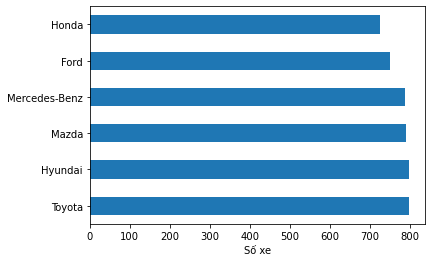

In [27]:
used_car_df['make'].value_counts().plot.barh()
plt.xlabel('Số xe')

### Biểu đồ bar chart thể hiện mỗi quan hệ giữa: loại nhiên liệu và số lượng xe

Text(0.5, 0, 'Số xe')

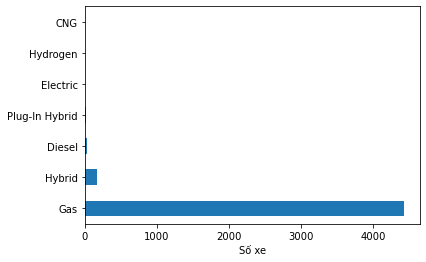

In [28]:
used_car_df['fuel type'].value_counts().plot.barh()
plt.xlabel('Số xe')

# Đặt câu hỏi

**Câu hỏi:** làm sao để dự đoán giá trị của một chiếc xe cũ, đã qua sử dụng dựa trên các thông số của chiếc xe đó?

Câu hỏi này giải quyết được 2 vấn đề trong thực tế:
* Cho các người chủ muốn bán xe:
    * Họ ước lượng trước được giá trị của chiếc xe mà mình muốn bán dựa trên giá thị trường hiện tại. Để khi đến bất kì nơi bán nào, họ có thể thương lượng giá cả tốt hơn
* Cho các đại lý mua bán xe cũ:
    * Biết được giá trị thị trường, để có thể thương lượng giá cả với người bán
    * Nếu đã sở hữu xe cũ --> có thể đưa ra giá trị chiếc xe để bán đi

# Tiền xử lý

## Xóa cột "body style"

Ta thấy cột **"body style"** có quá nhiều giá trị có thể xảy ra nên có thể dẫn đến phức tạp cho mô hình dự đoán, ta phải xử lý nó bằng cách:
* Xóa cột đó khỏi dataframe, ta không dự đoán giá trị chiếc xe trên thuộc tính **"body style"** nữa

In [29]:
used_car_df = used_car_df.drop(columns = ['body style'], axis = 1)
used_car_df

,make,model,year,mileage,engine,fuel type,number of owners,price
0,Honda,Odyssey,2013,122986.0,3.5,Gas,2.0,12895.0
1,Honda,Pilot,2013,80532.0,3.5,Gas,3.0,11694.0
2,Honda,CR-V,2013,79796.0,2.4,Gas,1.0,13590.0
3,Honda,Civic,2013,76882.0,1.8,Gas,1.0,7986.0
4,Honda,Civic,2013,113673.0,1.8,Gas,1.0,6990.0
...,...,...,...,...,...,...,...,...
4795,Mazda,CX-5,2020,13964.0,2.5,Gas,1.0,23888.0
4796,Mazda,CX-5,2020,3759.0,2.5,Gas,1.0,22498.0
4797,Mazda,CX-5,2020,9916.0,2.5,Gas,1.0,21990.0
4798,Mazda,CX-9,2020,5176.0,2.5,Gas,1.0,36992.0


In [30]:
used_car_df.dtypes

make                 object
model                object
year                  int64
mileage             float64
engine              float64
fuel type            object
number of owners    float64
price               float64
dtype: object

## Xử lý các cột có giá trị thiếu

### Các cột dạng số

Dựa vào bảng mô tả ở bước khám phá dữ liệu các cột dạng số bên trên, ta thấy có 3 cột có giá trị thiếu:
* Cột **"engine"**
* Cột **"number of owners"**
* Cột **"price"**

#### Xử lý cột "engine"

In [ ]:
# Tiến hành xử lý các giá trị thiếu cho cột "engine"
# TODO

#### Xử lý cột "number of owners"

Cột "number of owners" có giá trị min = 0 - nghĩa là xe cũ nhưng vẫn chưa có chủ sở hữu --> không phù hợp với tiêu chí thực hiện của. Chúng ta đang dự đoán giá xe mà đã qua sử dụng

--> Giá trị trong cột "number of owners" mà bằng 0 thì ta sẽ gán cho nó = 1

In [ ]:
# gán giá trị = 1 cho các giá trị đang = 0 trong cột "number of owners"

In [ ]:
# Tiến hành xử lý các giá trị thiếu cho cột "number of owners"
# TODO

#### Xử lý cột "price"

In [ ]:
# Tiến hành xử lý các giá trị thiếu cho cột "price"
# TODO

### Các cột không phải dạng số (category)

Dựa vào bảng mô tả ở bước khám phá dữ liệu các cột dạng số bên trên, ta thấy chỉ có 1 cột có giá trị thiếu:
* Cột **"model"**

#### Xử lý cột "model"

In [ ]:
# Tiến hành xử lý các giá trị thiếu cho các cột
# TODO